# Random Forest in 2SLS: A Comparison Study
 Manuel Thomas, Matriculation Number: 3205373



# 1. Abstract

This project attempts to implement RF into IV estimation and checks whether it improves on the standard method of 2SLS. DGP is based on an empirical paper ”Network effects and the dynamics of migration and inequality: Theory and evidence from Mexico”, which is concerned with relationship between inequality and migration prevalence and uses 2SLS as a way of dealing with possible endogeneity. We find that using RF in place of OLS in first stage of IV estimation gives better results under certain conditions.




# 2. Introduction

The paper we chose as inspiration for the project is ”Network effects and the dynamics of migration and inequality: Theory and evidence from Mexico”. Its findings suggest that migration may increase inequality in the economy in the short term, but this is a temporary effect, when the networks are sufficiently developed there is a drop in the inequality. Two data sets are used for the empirical analysis: the Mexican Migration Project (MMP) survey consists of data from 57 rural communities typically located in areas of high migration, while the national demographic dynamics survey (ENADID) consists of a representative sample of 214 rural communities in Mexico. 

This paper shows both theoretically and empirically (using both OLS and 2SLS as endogeneity check) that wealth has a nonlinear effect on migration, and then examines the empirical evidence for an inverse U-shaped relationship between emigration and inequality in rural sending communities in Mexico. The networks formed by the migrant population and the natives interestingly determine the future cost of migration and a higher level of network system reduces the future cost of migration, hence reducing the inequality in the economy.  

The reason for using 2SLS as an estimation method in this paper is stated by the authors. They are concerned that there are unobserved community characteristics that are correlated with both migration prevalence and current inequality, which might cause endogeneity bias. 2SLS is a well-used instrument in a structural econometrician's tool-box. The question we ask in this paper is whether we can use Machine Learning techniques, in this particular case Random Forest, to improve upon this estimation procedure.

To better understand the idea behind our proposal, let us first intuitively explain when we need instrumental variables and how we use them for dealing with endogeneity bias. 

## 2.1. When does endogeneity occur and what is endogeneity bias

Endogeneity occurs when an explanatory variable is correlated with the error term. If not taken into account, this could lead to biased estimates, as it violates Gauss–Markov theorem of exogeneity. There can be many reasons why we have endogeneity, however, we are dealing with omitted variable bias in this particular paper. For example, take the true model:
    $$y_{i}=\alpha +\beta x_{i}+\gamma z_{i}+u_{i}$$
But we just have the observed model, which doesn't include $z_i$:
    $$y_i=\alpha+\beta x_i+\epsilon_i$$  
where $\epsilon _{i}=\gamma z_{i}+u_{i}$ (thus, the $z_{i}$ term has been absorbed into the error term).

If the correlation of $x$ and $z$ is not 0 and $z$ separately affects $y$ (meaning $\gamma \neq 0$), then $x$ is correlated with the error term $\epsilon$ .

Here, $x$ is not exogenous for $\alpha$ and $\beta$ , since, given $x$, the distribution of $y$ depends not only on $\alpha$ and $\beta$ , but also on $z$ and $\gamma$ . 

Instruments are variables that are correlated with the endogenous variable but uncorrelated with the error term. Those are two conditions for a good instrument. If both are satisfied, the 2SLS beta-estimator corresponding to the endogenous variable will be consistent. The rule of thumb is the stronger the correlation between the endogenous variable and the instrument, the better the estimate. 

The basic 2SLS estimation is done in two steps. In the first stage we regress the endogenous variable on all the explanatory variables (it is easy to see that all exogenous variables can be used as instruments) and then in the second stage we use the predicted values of the endogenous variable in the primary regression in place of its real values. Going back to the empirical example, in the cited paper authors instrument migration prevalence and migration squared with historic state-level migration rates($IV1$) and U.S. labor market conditions($IV2$) and then use the predicted values in the regression of inequality on migration.

# 3. Methodology

As explained above, the authors use 2SLS in their paper to account for endogeneity bias and get consistent estimates of the betas for migration variables. This is a very common empirical problem in structural modelling, as real data in its characteristics is often much removed from the ideal data we can generate in simulation; and it is on the ideal data that most estimation procedures work the best, as these properties are the basis of the theory behind them. In real empirical data we very rarely can vouch with complete certainty that this or that variable has no correlation with other variables we can not estimate, and even more rarely that there exist no more relevant explanatory variables that we could include in the model. This makes IVs one of the most commonly used tools in empirical papers. 

In the light of how common this issue is, the estimation procedure proposed in this paper could become an interesting addition to the basic structural estimation toolbox. As demonstrated earlier, the first stage of 2SLS estimation requires prediction of the endogenous variables via regression on its instruments. At this stage we are not really interested in betas generated from such an estimation, but only in predicted values, which are then used to estimate the second stage regression. Moreover, the precision of the first stage estimation is vitally important for the second stage, which is precisely why it makes sense to see if there are different prediction techniques that can be used and if they perform better than OLS in terms of giving us a consistent value for parameters corresponding to endogenous variables. In this paper we propose to use Random Forest for first stage estimation in 2SLS and compare, whether the estimated parameters in the second stage are closer to the underlying betas used in the data-generating process on average, with different number of observations and different levels of correlation between endogenous variables and instruments.

## 3.1. Random Forest

Random Forest consists of a number of decision trees built on bootstrapped training samples. But when building these decision trees, each time a split in a tree is considered, a random sample of m predictors is chosen as split candidates from the full set of p predictors. The split is allowed to use only one of those m predictors. A fresh sample of m predictors is taken at each split. The algorithm for the decision tree is very well illustrated in the attached graph.

One of the useful features of Random Forest is that it uses multiple sampling to create estimates of the Forest, which are based on the individual tree predictions. This allows us to skip splitting the dataset and training and test part, allowing us to keep all the data for estimation, which is useful in empirical structural estimation, where datasets are scarce. 

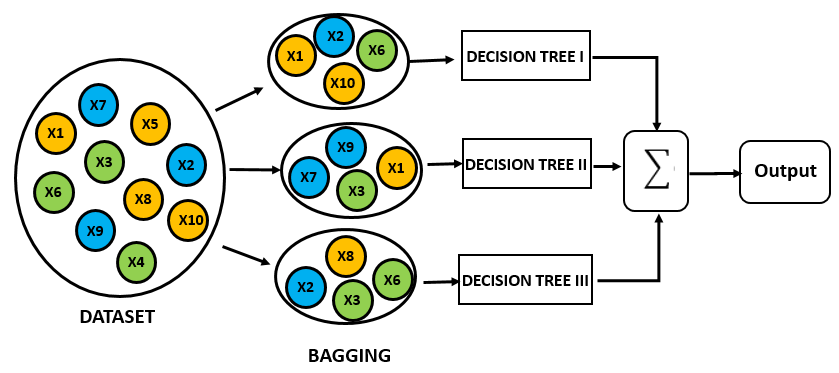

## 3.2. Data Generating Process


As explained above, the authors are mainly concerned with inequality and how it varies with migration prevalence. Assuming the endogeneity of the variable migration prevalence, they attempt to overcome this by instrumenting it.  They model current inequality for community $i$, $Ineq_i$ as a quadratic function of migration prevalence, $mig_i$, and a vector of other community characteristics, $X_i$:

$$Ineq_i = \alpha_0 + \alpha_1mig_i + \alpha_2mig_i^2+\gamma'X_i + \epsilon_i$$

For ease of comparison with the empirical example, we will keep the names of variables as they were in the paper. In our study we exclude other exogenous variable i.e $X_i$ from the model, so that we can focus on the problem of endogeneity, but otherwise keep the original structure of the data. To create endogeneity we presuppose that error can be split into an unproblematic and a problematic part, where the prob_var is the cause for the endogeneity, that the authors in the original paper feared might be present.

Hence, we model inequality to be given by:

$$Ineq_i = \beta_0 + \beta_1mig_i + \beta_2mig_i^2+prob\_var+\zeta_i$$

And make the endogeneous variable also depend on the prob_var:

$$mig = mx + IV_1 + IV_2+ prob\_var,$$

where $mx$ is an exogenous factor, $IV_1$ and $IV_2$ are two instrumental variables we are using and $prob\_var$ is part of the error term $\epsilon_i$. Notice that instrumental variables affect the dependent variable(i.e inequality) only indirectly through the endogenous variable (i.e migration prevalence), which makes them valid.

We now generate this data in Rstudio as given below:

,ineq,mig,mig_2,iv_1,iv_2,prob_var,e
ineq,1.0000000,0.9177057,0.9939889,0.5271759,0.5940557,0.18066313,0.27554223
mig,0.9177057,1.0000000,0.8700215,0.5661250,0.6377412,0.29479742,0.21283834
mig_2,0.9939889,0.8700215,1.0000000,0.4992771,0.5669904,0.14189324,0.25958570
iv_1,0.5271759,0.5661250,0.4992771,1.0000000,-0.2337668,0.10130445,0.23624789
iv_2,0.5940557,0.6377412,0.5669904,-0.2337668,1.0000000,0.18505378,0.09532800
prob_var,0.1806631,0.2947974,0.1418932,0.1013045,0.1850538,1.00000000,-0.06662863
e,0.2755422,0.2128383,0.2595857,0.2362479,0.0953280,-0.06662863,1.00000000


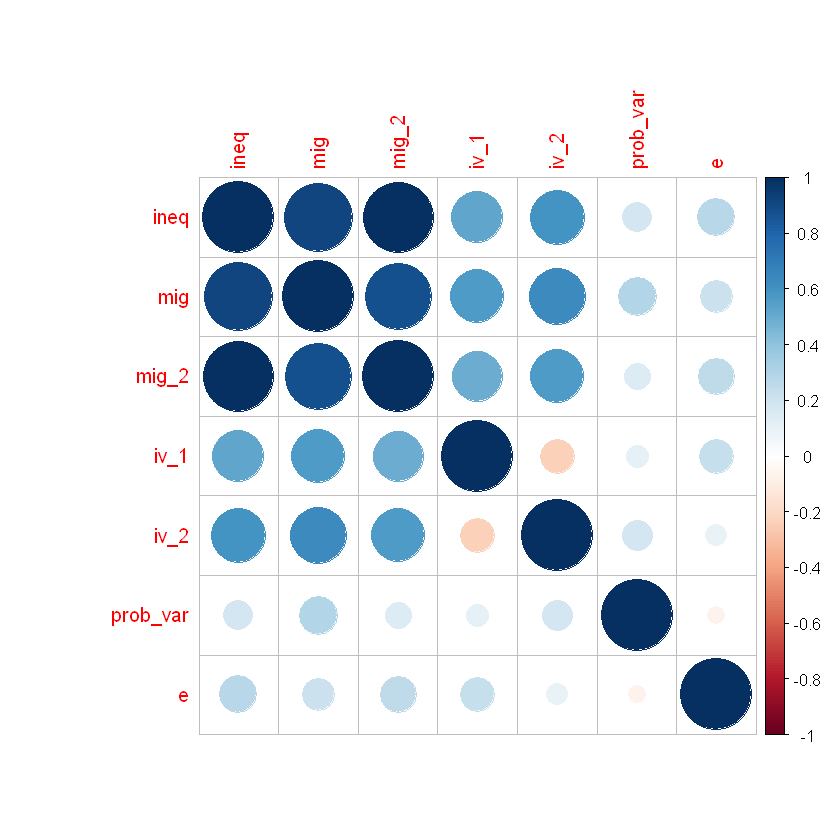

In [2]:
library(cowplot)
library(randomForest)
library(AER)
library(corrplot)


set.seed(1)
genData <- function(n, beta_0, beta_1, beta_2, mean, sd, mean_p, sd_p){
  mx=rnorm(n,mean,sd)
  prob_var=rnorm(n,mean_p,sd_p)
  iv_1=rnorm(n,2,3)
  iv_2=rnorm(n,1,3)
  e=rnorm(n,0,1)
  mig=mx+prob_var+iv_1+iv_2
  mig_2<-mig^2

  #Add an explanation to the dgp process
  ineq=2+2.5*mig+1*(mig_2)+prob_var+e
  data=data.frame(ineq,mig,mig_2,iv_1,iv_2)
  sample <- sample(1:n,size=0.7*n)
  train <- data[sample, ]
  test  <- data[-sample, ]
  data1=data.frame(ineq,mig,mig_2,iv_1,iv_2,prob_var,e)
  dataset<-list(data,train,test,data1)
  return(dataset)
}
beta_0<-2
beta_1<-2.5
beta_2<-1
mean<-1
sd<-1
mean_p<-1
sd_p<-0.25
n=57
datagen<-genData(n,beta_0,beta_1,beta_2,mean,sd, mean_p, sd_p)
data<-datagen[[1]]
train<-datagen[[2]]
test<-datagen[[3]]
data1<-datagen[[4]]
res <- cor(data1)
cor(data1)
#make a cool graph
corrplot(res, method="circle")


The table above shows the correlation between the different variables we generated for the study. We observe that there is a significant correlation between migration prevalence and instrumental variables, which is what we wanted to achieve. We also see small yet significant correlation exist between $prob\_var$ and migration prevelance, therein lies the problem. The plot shows an illustrative display of correlation for the same variables.

## 3.3. First Stage 2SLS

In the first stage of 2SLS we regress migration prevalence and migration prevalence squared on instrumental variables.
We regress migration squared seperately on the same instrumental variables to avoid the $Forbidden$ $Regression$ issue.

The regression is done using OLS and Random Forest here. After running the estimation we predict the value $\hat{mig}$ and $\hat{mig^2}$. Then we use these value in the next stage of 2SLS.

In [3]:
# First stage OLS for migration and migration squared

#Estimate OLS for migration
modeliv<-lm(mig ~ iv_1 +iv_2, data=data)
#Calculate residuals
re<-modeliv$residuals
MSE_migiv<-mean(re^2)
#Predict migration
mig_hativ<-predict(modeliv,data=data)
#Estimate OLS for migration squared
modeliv2<-lm(mig_2 ~ iv_1 +iv_2, data=data)
#Calculate MSE
re1<-modeliv$residuals
MSE_migiv2<-mean(re1^2)
#Predict values for migration squared
mig_2hativ<-predict(modeliv2,data=data)


#First stage RF for migration and migration squared

#Estimate RF for migration:
modelrf <- randomForest(mig ~ iv_1 +iv_2, data=data,
                        ntree=100, 
                        proximity=TRUE)
#Calculate MSE:
MSE_rf<-mean(modelrf$mse)
#Predict values of migration:
mig_hatrf<-predict(modelrf, data=data)
#Estimate RF for migration squared:
modelrf2 <- randomForest(mig_2 ~ iv_1 +iv_2, data=data,
                      ntree=100, 
                      proximity=TRUE)
#Calculate MSE:
MSE_rf2<-mean(modelrf2$mse)
#Predcit values for migration squared
mig2_hatrf<-predict(modelrf2, data=data)

## 3.4. Second Stage IV-estimation

Proceeding to the second stage, we use estimated values of migration prevalence and migration prevalence squared obtained via OLS and RF for regression corresponding to this structural equation:

$$Ineq_i ~ \beta_0 + \beta_1\hat{mig_i} + \beta_2\hat{mig_i^2}+ \epsilon_i$$

In [4]:
#Second stage using OLS predicted values:
secondiv<-lm(data$ineq~mig_hativ+mig_2hativ)
coeffiv<-secondiv$coefficients

#Second stage using RF predicted values:
secondrf<-lm(data$ineq~mig_hatrf+mig2_hatrf)
coeffrf<-secondrf$coefficients

#Original betas
beta=c(beta_0,beta_1,beta_2)

data.frame(Original_2SLS=coeffiv, Random_Forest=coeffrf, Real_betas=beta)

,Original_2SLS,Random_Forest,Real_betas
(Intercept),1.55549672,-14.359231,2.0
mig_hativ,10.38580819,4.154455,2.5
mig_2hativ,0.05235491,1.291621,1.0


Using Random Forest gives us smaller bias in comparison with OLS for this set of data. We want to see on average which estimation gives us better results, so the next part of this paper is on how bias and MSE change, when we change the parameters of the model in different ways.


# 4. Simulation Study

## 4.1. Average performance comparison for n=1000

We do a simulation study keeping n=1000 here. IV performs better on big samples than small samples in general, so we create ideal environment for IV to perform at it's best. We expose Random Forest to the same conditions and see how it performs in comparison with the IV method.

In [5]:
coeffiv_data<-c()
coeffrf_data<-c()
mseivmig<-c()
mseivmig2<-c()
mserfmig<-c()
mserfmig2<-c()
l<-50


for(n in 1:l){
  datagen<-genData(1000,beta_0,beta_1,beta_2,mean,sd, mean_p, sd_p)
  data=datagen[[1]]
  #estimate mig with OLS
  modeliv<-lm(mig ~ iv_1 +iv_2, data=data)
  mig_hativ<-predict(modeliv,data=data)
  #store mse
  re<-modeliv$residuals
  MSE_migiv<-mean(re^2)
  mseivmig<-c(mseivmig, MSE_migiv)
  #estimate mig_2 with OLS
  modeliv2<-lm(mig_2 ~ iv_1 +iv_2, data=data)
  re1<-modeliv2$residuals
  #store mse from mig_2
  MSE_migiv2<-mean(re1^2)
  mseivmig2<-c(mseivmig2, MSE_migiv2)
  #predict mig_2 with OLS
  mig_2hativ<-predict(modeliv2,data=data)
  #predict mig with RF
  modelrf <- randomForest(mig ~ iv_1 +iv_2, data=data,
                          ntree=100, 
                          proximity=TRUE)
  mig_hatrf<-predict(modelrf, data=data)
  #store mse from RF
  MSE_rf<-mean(modelrf$mse)
  mserfmig<-c(mserfmig,MSE_rf)
  #predict mig_2 with RF
  modelrf2 <- randomForest(mig_2 ~ iv_1 +iv_2, data=data,
                           ntree=100, 
                           proximity=TRUE)
  mig2_hatrf<-predict(modelrf2, data=data)
  #store mse
  MSE_rf2<-mean(modelrf$mse)
  mserfmig2<-c(mserfmig2,MSE_rf2)
  #Second stage with OLS
  secondiv<-lm(data$ineq~mig_hativ+mig_2hativ)
  coeffiv<-secondiv$coefficients
  coeffiv_data<-rbind(coeffiv_data,coeffiv)
  #Second stage with RF
  secondrf<-lm(data$ineq~mig_hatrf+mig2_hatrf)
  coeffrf<-secondrf$coefficients
  coeffrf_data<-rbind(coeffrf_data,coeffrf)
}

rownames(coeffrf_data)<-1:50
rownames(coeffiv_data)<-1:50
biasmigiv<-coeffiv_data[,2]-rep(2.5,50)
biasmigrf<-coeffrf_data[,2]-rep(2.5,50)
biasmig2iv<-coeffiv_data[,3]-rep(1,50)
biasmig2rf<-coeffrf_data[,3]-rep(1,50)
MSEMEGA=data.frame(iteration=c(1:50),mseivmig,mserfmig,mseivmig2,mserfmig2)


Warning message in par(xpd = xpd):
"NAs introduced by coercion"

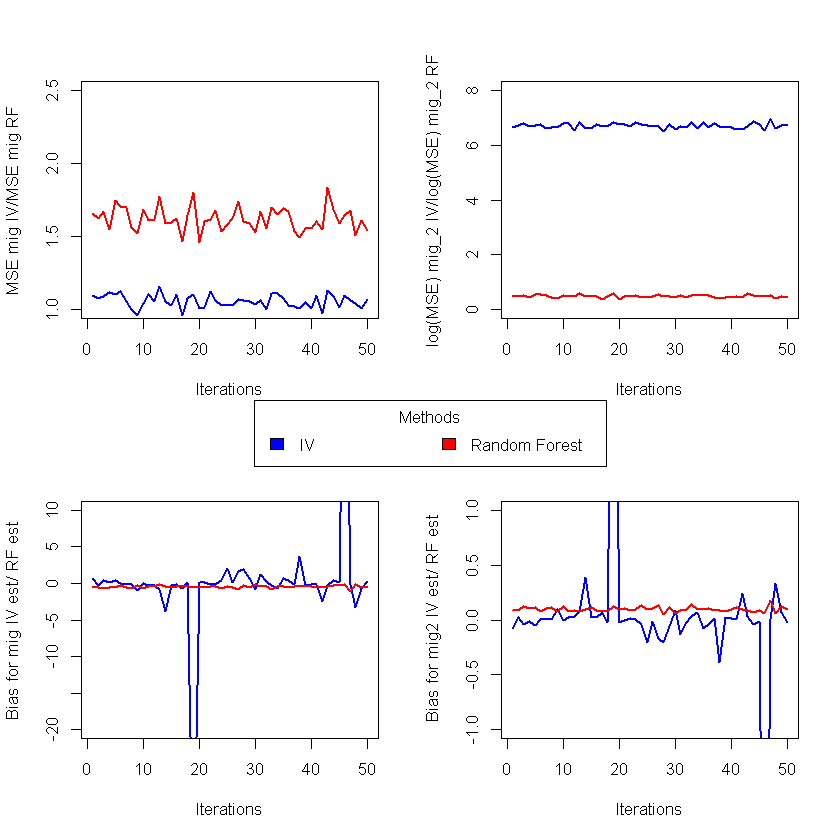

In [6]:
par(mfrow=c(2,2))

#MSE Migration
plot(MSEMEGA$iteration, MSEMEGA$mseivmig, xlab="Iterations", ylab="MSE mig IV/MSE mig RF", type="l", col="blue", lty=1, lwd=2, ylim=c(1,2.5) )
lines(MSEMEGA$iteration, MSEMEGA$mserfmig, col="red",lty=1, lwd=2)

#MSE Migration^2
plot(MSEMEGA$iteration, log(MSEMEGA$mseivmig2), xlab="Iterations", ylab="log(MSE) mig_2 IV/log(MSE) mig_2 RF", type="l", col="blue", lty=1, lwd=2, ylim=c(0,8) )
lines(MSEMEGA$iteration, log(MSEMEGA$mserfmig2), col="red",lty=1, lwd=2)

#BIAS Migration
plot(1:50, biasmigiv, type="l", col="blue",xlab="Iterations", ylab="Bias for mig IV est/ RF est", lty=1, lwd=2, ylim=c(-20,10) )
lines(1:50, biasmigrf, col="red",lty=1, lwd=2)

#BIAS Migration^2
plot(1:50, biasmig2iv, xlab="Iterations", ylab=" Bias for mig2 IV est/ RF est", type="l", col="blue", lty=1, lwd=2, ylim=c(-1,1) )
lines(1:50, biasmig2rf, col="red",lty=1, lwd=2)
legend(-45,2, ncol=2,legend=c("IV","Random Forest"), fill=c("blue","red"), title="Methods",xpd="NA")

par(mfrow=c(1,1))


For the first graph we see the MSE($mig$) for IV method is less than that of Random Forest for all the iterations. This could be an indication that IV methods work better when performed on linear data. We see that MSE($mig_2$) for Random Forest performs significantly better than IV in the second graph, again implying that IV method works better with linear data rather than non linear.

The bias($mig$) for IV method is very erratic when compared to Random Forest, the same is the case for bias($mig_2$).
It appears that even though IV method performs better on $mig$ with respect to MSE, in all other cases Random Forest works better. However, from the graphs we see that the estimates for RF are biased in an imperticeable way, which might be an indication of the model overfitting and thus the estimator being biased by the endogeneity.



## 4.2. Perfomance comparison when n varies from 100 to 5000

Now we are creating a loop such that the n varies from 100 to 5000. In empirical research, like in the paper we draw inspiration from, there is very rarely a huge sample available for estimation. For this purpose we want to see if RF performs better with small samples than IV does.

In [7]:
coeffiv_data<-c()
coeffrf_data<-c()
mseivmig<-c()
mseivmig2<-c()
mserfmig<-c()
mserfmig2<-c()
l<-50

for(n in 1:l){
  datagen<-genData(n*100,beta_0,beta_1,beta_2, mean, sd, mean_p, sd_p)
  data=datagen[[1]]
  
  modeliv<-lm(mig ~ iv_1 +iv_2, data=data)
  re<-modeliv$residuals
  MSE_migiv<-mean(re^2)
  mseivmig<-c(mseivmig, MSE_migiv)
  #predict mig with OLS
  mig_hativ<-predict(modeliv,data=data)
  #mse
  modeliv2<-lm(mig_2 ~ iv_1 +iv_2, data=data)
  re1<-modeliv2$residuals
  MSE_migiv2<-mean(re1^2)
  mseivmig2<-c(mseivmig2, MSE_migiv2)
  #predict mig_2 with OLS
  mig_2hativ<-predict(modeliv2,data=data)
  #predict mig with RF
  modelrf <- randomForest(mig ~ iv_1 +iv_2, data=data,
                          ntree=100, 
                          proximity=TRUE)
  MSE_rf<-mean(modelrf$mse)
  mserfmig<-c(mserfmig,MSE_rf)
  mig_hatrf<-predict(modelrf, data=data)
  #predict mig_2 with RF
  modelrf2 <- randomForest(mig_2 ~ iv_1 +iv_2, data=data,
                           ntree=100, 
                           proximity=TRUE)
  MSE_rf2<-mean(modelrf$mse)
  mserfmig2<-c(mserfmig2,MSE_rf2)
  mig2_hatrf<-predict(modelrf2, data=data)
  #Second stage with OLS
  secondiv<-lm(data$ineq~mig_hativ+mig_2hativ)
  coeffiv<-secondiv$coefficients
  coeffiv_data<-rbind(coeffiv_data,coeffiv)
  #Second stage with RF
  secondrf<-lm(data$ineq~mig_hatrf+mig2_hatrf)
  coeffrf<-secondrf$coefficients
  coeffrf_data<-rbind(coeffrf_data,coeffrf)
}
rownames(coeffrf_data)<-1:50
rownames(coeffiv_data)<-1:50
biasmigiv<-coeffiv_data[,2]-rep(2.5,50)
biasmigrf<-coeffrf_data[,2]-rep(2.5,50)
biasmig2iv<-coeffiv_data[,3]-rep(1,50)
biasmig2rf<-coeffrf_data[,3]-rep(1,50)
MSEMEGA=data.frame(mseivmig,mserfmig,mseivmig2,mserfmig2, iteration=c(1:50))

Warning message in par(xpd = xpd):
"NAs introduced by coercion"

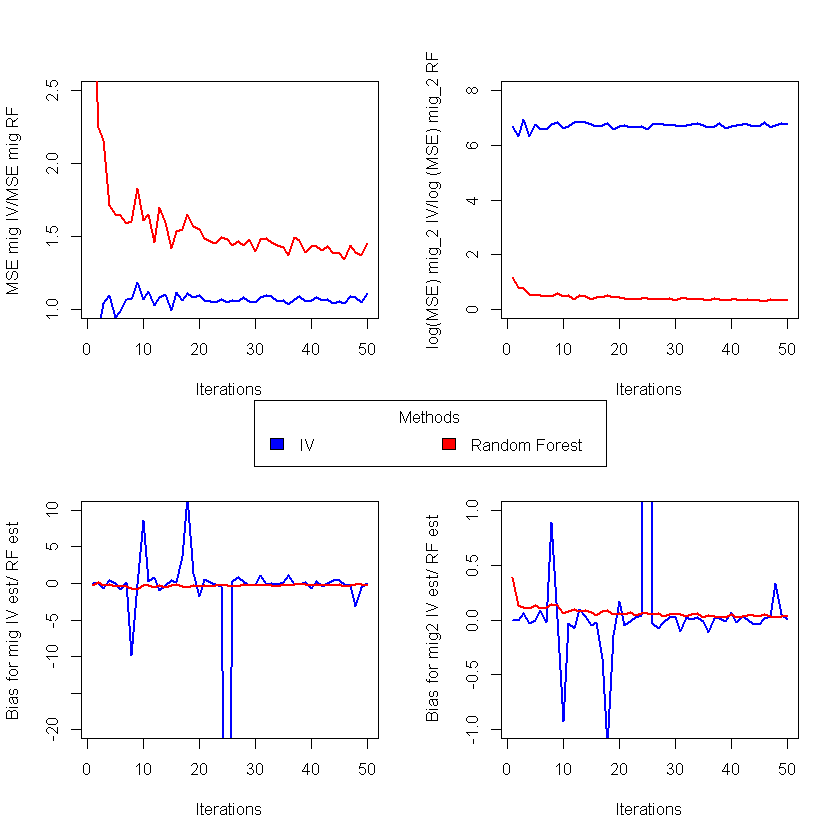

In [8]:
par(mfrow=c(2,2))

#MSEMIG
plot(1:50, MSEMEGA$mseivmig, xlab="Iterations", ylab="MSE mig IV/MSE mig RF", type="l", col="blue", lty=1, lwd=2, ylim=c(1,2.5) )
lines(1:50, MSEMEGA$mserfmig, col="red",lty=1, lwd=2)
#MSEMIG2
plot(1:50, log(MSEMEGA$mseivmig2), xlab="Iterations", ylab="log(MSE) mig_2 IV/log (MSE) mig_2 RF", type="l", col="blue", lty=1, lwd=2, ylim=c(0,8) )
lines(1:50, log(MSEMEGA$mserfmig2), col="red",lty=1, lwd=2)
#BIASMIG
plot(1:50, biasmigiv, type="l", col="blue",xlab="Iterations", ylab="Bias for mig IV est/ RF est", lty=1, lwd=2, ylim=c(-20,10) )
lines(1:50, biasmigrf, col="red",lty=1, lwd=2)
#BIASMIG2
plot(1:50, biasmig2iv, xlab="Iterations", ylab=" Bias for mig2 IV est/ RF est", type="l", col="blue", lty=1, lwd=2, ylim=c(-1,1) )
lines(1:50, biasmig2rf, col="red",lty=1, lwd=2)
legend(-45,2, ncol=2,legend=c("IV","Random Forest"), fill=c("blue","red"), title="Methods",xpd="NA")

par(mfrow=c(1,1))

We see a similar result when comparing with the previous section. The MSE($mig$) for IV method is less than Random Forest. However the MSE($mig_2$) for Random Forest is less than that of IV method. Again bias for IV methods are very unstable when compared to Random Forest. However, it seems like for huge samples the "consistent" bias we have noticed in the previous section seems to disappear.

## 4.3. Performance comparison when correlation between IV and endogenous variable is changed
The high correlation between instrumental variables and endogenous variables is vital. It can be shown mathematically, that when this condition doesn't hold, IV estimator will not produce good results. Keeping this in mind, we try varying the correlation between the endogenous variable and the instrumental variables and compare, which of two estimation methods we are using holds up better, when correlation is decreasing. 

In [9]:
coeffiv_data<-c()
coeffrf_data<-c()
mseivmig<-c()
mseivmig2<-c()
mserfmig<-c()
mserfmig2<-c()
coriv1_mig<-c()
coriv1_mig2<-c()
coriv2_mig<-c()
coriv2_mig2<-c()

l<-50

for(n in 1:l){
  datagen<-genData(1000,beta_0,beta_1,beta_2, mean+(n-1)*0.1, sd+(n-1)/10, mean_p, sd_p)
  data=datagen[[1]]
  data1<-datagen[[4]]
  res <- cor(data1)
  coriv1_mig<-c( coriv1_mig,res[4,2])
  coriv1_mig2<-c(coriv1_mig2,res[4,3])
  coriv2_mig<-c(coriv2_mig,res[5,2])
  coriv2_mig2<-c(coriv2_mig2,res[5,3])
  
  
  #make a cool graph 
  #corrplot(res, method="circle")
  
  modeliv<-lm(mig ~ iv_1 +iv_2, data=data)
  mig_hativ<-predict(modeliv,data=data)
  #store mse
  re<-modeliv$residuals
  MSE_migiv<-mean(re^2)
  mseivmig<-c(mseivmig, MSE_migiv)
  #estimate mig_2 with OLS
  modeliv2<-lm(mig_2 ~ iv_1 +iv_2, data=data)
  re1<-modeliv2$residuals
  #store mse from mig_2
  MSE_migiv2<-mean(re1^2)
  mseivmig2<-c(mseivmig2, MSE_migiv2)
  #predict mig_2 with OLS
  mig_2hativ<-predict(modeliv2,data=data)
  #predict mig with RF
  modelrf <- randomForest(mig ~ iv_1 +iv_2, data=data,
                          ntree=100, 
                          proximity=TRUE)
  mig_hatrf<-predict(modelrf, data=data)
  #store mse from RF
  MSE_rf<-mean(modelrf$mse)
  mserfmig<-c(mserfmig,MSE_rf)
  #predict mig_2 with RF
  modelrf2 <- randomForest(mig_2 ~ iv_1 +iv_2, data=data,
                           ntree=100, 
                           proximity=TRUE)
  mig2_hatrf<-predict(modelrf2, data=data)
  #store mse
  MSE_rf2<-mean(modelrf$mse)
  mserfmig2<-c(mserfmig2,MSE_rf2)
  #Second stage with OLS
  secondiv<-lm(data$ineq~mig_hativ+mig_2hativ)
  coeffiv<-secondiv$coefficients
  coeffiv_data<-rbind(coeffiv_data,coeffiv)
  #Second stage with RF
  secondrf<-lm(data$ineq~mig_hatrf+mig2_hatrf)
  coeffrf<-secondrf$coefficients
  coeffrf_data<-rbind(coeffrf_data,coeffrf)
}
biasmigiv<-coeffiv_data[,2]-rep(2.5,50)
biasmigrf<-coeffrf_data[,2]-rep(2.5,50)
biasmig2iv<-coeffiv_data[,3]-rep(1,50)
biasmig2rf<-coeffrf_data[,3]-rep(1,50)
res <- cor(data1)
MSEMEGA=cbind(mseivmig,mserfmig,mseivmig2,mserfmig2)


Warning message in par(xpd = xpd):
"NAs introduced by coercion"

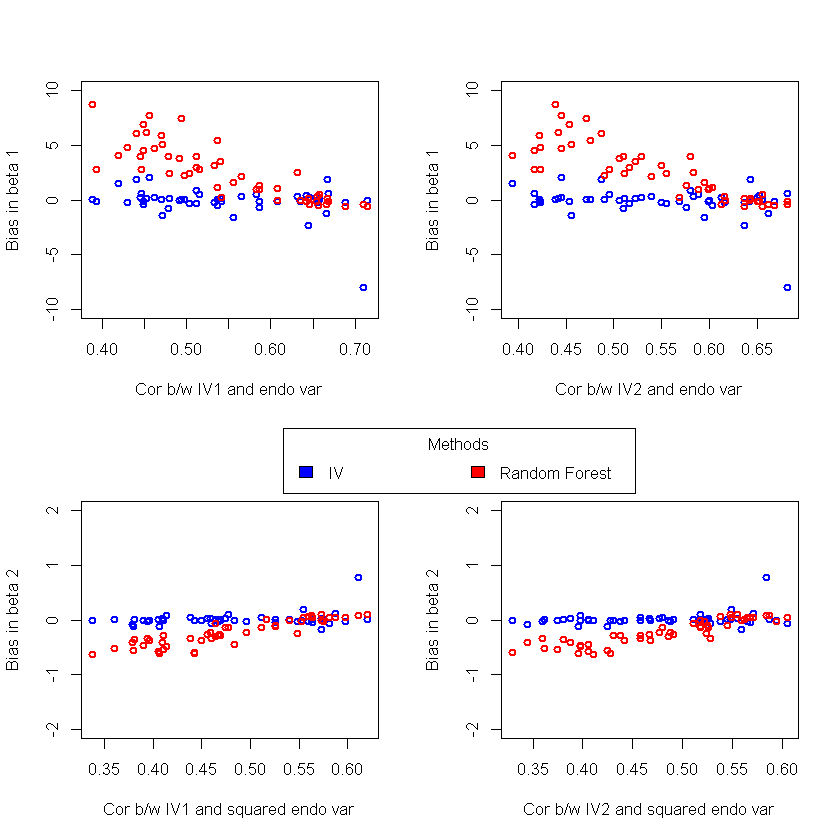

In [10]:
par(mfrow=c(2,2))

#Bias vs correlation
#migration
#iv1
plot(coriv1_mig, biasmigiv, xlab="Cor b/w IV1 and endo var", ylab="Bias in beta 1", type="p", col="blue", lty=1, lwd=2, ylim=c(-10,10) )
points(coriv1_mig, biasmigrf, col="red",lty=1, lwd=2)
#iv2
plot(coriv2_mig, biasmigiv, xlab="Cor b/w IV2 and endo var", ylab="Bias in beta 1", type="p", col="blue", lty=1, lwd=2, ylim=c(-10,10) )
points(coriv2_mig, biasmigrf, col="red",lty=1, lwd=2)
#migration_sq
#iv_1
plot(coriv1_mig2, biasmig2iv, xlab="Cor b/w IV1 and squared endo var", ylab="Bias in beta 2", type="p", col="blue", lty=1, lwd=2, ylim=c(-2,2) )
points(coriv1_mig2, biasmig2rf, col="red",lty=1, lwd=2)
#iv_2
plot(coriv2_mig2, biasmig2iv, xlab="Cor b/w IV2 and squared endo var", ylab="Bias in beta 2", type="p", col="blue", lty=1, lwd=2 , ylim=c(-2,2))
points(coriv2_mig2, biasmig2rf, col="red",lty=1, lwd=2)
legend(0.1,3.5, ncol=2,legend=c("IV","Random Forest"), fill=c("blue","red"), title="Methods",xpd="NA")

par(mfrow=c(1,1))

We see the Random Forest perform better when the correlation between endogenous variable and instrumental variables are strong, but with lower values of correlation the estimator is biased. IV method estimator converges to the original beta when correlation is high, but has a high variance and bias when correlation is low (which is not, however, skewed to one side, like it is for RF). The high correlation between the IVs and the endogeneous variables is key to correctly estimating beta with 2SLS.

The possible reason for this difference is that RF ends up overfitting data and actually predicting the variation in the 'unobserved' part of migration, correlated with the 'unobserved' part of error in inequality - prob_var. This makes using RF with instruments that are not strongly correlated with the endogenous variable, practically useless. In the defense of our procedure, using IVs in such conditions is also not optimal.

In [ ]:
par(mfrow=c(2,2))
#Bias and mse versus iteration (gradual decrease in all correlations)
plot(1:50, biasmigiv, xlab="Iterations", ylab=" Bias for mig IV est/ RF est", type="l", col="blue", lty=1, lwd=2,  ylim=c(-10,10))
lines(1:50, biasmigrf, col="red",lty=1, lwd=2)

#Bias in mig2 parameter
plot(1:50, biasmig2iv, xlab="Iterations", ylab=" Bias for mig2 IV est/ RF est", type="l", col="blue", lty=1, lwd=2,  ylim=c(-2,2))
lines(1:50, biasmig2rf, col="red",lty=1, lwd=2)

#MSE for migration prediction
plot(1:50, MSEMEGA[,1], xlab="Iterations", ylab=" MSE for mig prediction", type="l", col="blue", lty=1, lwd=2,  ylim=c(0,15))
lines(1:50, MSEMEGA[,2], col="red",lty=1, lwd=2)

#MSE for mig2 prediction
plot(1:50, log(MSEMEGA[,3]), xlab="Iterations", ylab=" log MSE for mig2 prediction", type="l", col="blue", lty=1, lwd=2,  ylim=c(0,15))
lines(1:50, log(MSEMEGA[,4]), col="red",lty=1, lwd=2)
legend(-37,22, ncol=2,legend=c("IV","Random Forest"), fill=c("blue","red"), title="Methods",xpd="NA")


par(mfrow=c(1,1))


With each iteration the correlations between the endogenous variable and intrumental variables are decreasing. As a result we see an increase in the bias and MSE for both IV method as well as Random Forest. We see the same tendency in MSE when comparing to the previous sections. The MSE($mig$) is higher for Random Forest than IV method and vice versa for MSE($mig_2$).

## 3.5.4. Dealing with Overfitting
Since we suspect endogeneity to be skewing our estimator values, we are going to try and deal with it by making Random Forest fit the data less by way of reducing the number of trees. To make the effect more evident, we are going to make problematic variable "more pronounced" by increasing its mean and standard deviation.

In [11]:
coeffiv_data<-c()
coeffrf_data<-c()
mseivmig<-c()
mseivmig2<-c()
mserfmig<-c()
mserfmig2<-c()
l<-100

mean_p<-5
sd_p<-1


for(n in 1:l){
  datagen<-genData(1000,beta_0,beta_1,beta_2, mean, sd, mean_p, sd_p)
  data=datagen[[1]]
  
  modeliv<-lm(mig ~ iv_1 +iv_2, data=data)
  re<-modeliv$residuals
  MSE_migiv<-mean(re^2)
  mseivmig<-c(mseivmig, MSE_migiv)
  #predict mig with OLS
  mig_hativ<-predict(modeliv,data=data)
  #mse
  modeliv2<-lm(mig_2 ~ iv_1 +iv_2, data=data)
  re1<-modeliv2$residuals
  MSE_migiv2<-mean(re1^2)
  mseivmig2<-c(mseivmig2, MSE_migiv2)
  #predict mig_2 with OLS
  mig_2hativ<-predict(modeliv2,data=data)
  #predict mig with RF
  modelrf <- randomForest(mig ~ iv_1 +iv_2, data=data,
                          ntree=l, 
                          proximity=TRUE)
  MSE_rf<-mean(modelrf$mse)
  mserfmig<-c(mserfmig,MSE_rf)
  mig_hatrf<-predict(modelrf, data=data)
  #predict mig_2 with RF
  modelrf2 <- randomForest(mig_2 ~ iv_1 +iv_2, data=data,
                           ntree=l, 
                           proximity=TRUE)
  MSE_rf2<-mean(modelrf$mse)
  mserfmig2<-c(mserfmig2,MSE_rf2)
  mig2_hatrf<-predict(modelrf2, data=data)
  #Second stage with OLS
  secondiv<-lm(data$ineq~mig_hativ+mig_2hativ)
  coeffiv<-secondiv$coefficients
  coeffiv_data<-rbind(coeffiv_data,coeffiv)
  #Second stage with RF
  secondrf<-lm(data$ineq~mig_hatrf+mig2_hatrf)
  coeffrf<-secondrf$coefficients
  coeffrf_data<-rbind(coeffrf_data,coeffrf)
}
rownames(coeffrf_data)<-1:100
rownames(coeffiv_data)<-1:100
biasmigiv<-coeffiv_data[,2]-rep(2.5,100)
biasmigrf<-coeffrf_data[,2]-rep(2.5,100)
biasmig2iv<-coeffiv_data[,3]-rep(1,100)
biasmig2rf<-coeffrf_data[,3]-rep(1,100)
MSEMEGA=data.frame(mseivmig,mserfmig,mseivmig2,mserfmig2, iteration=c(1:100))

Warning message in par(xpd = xpd):
"NAs introduced by coercion"

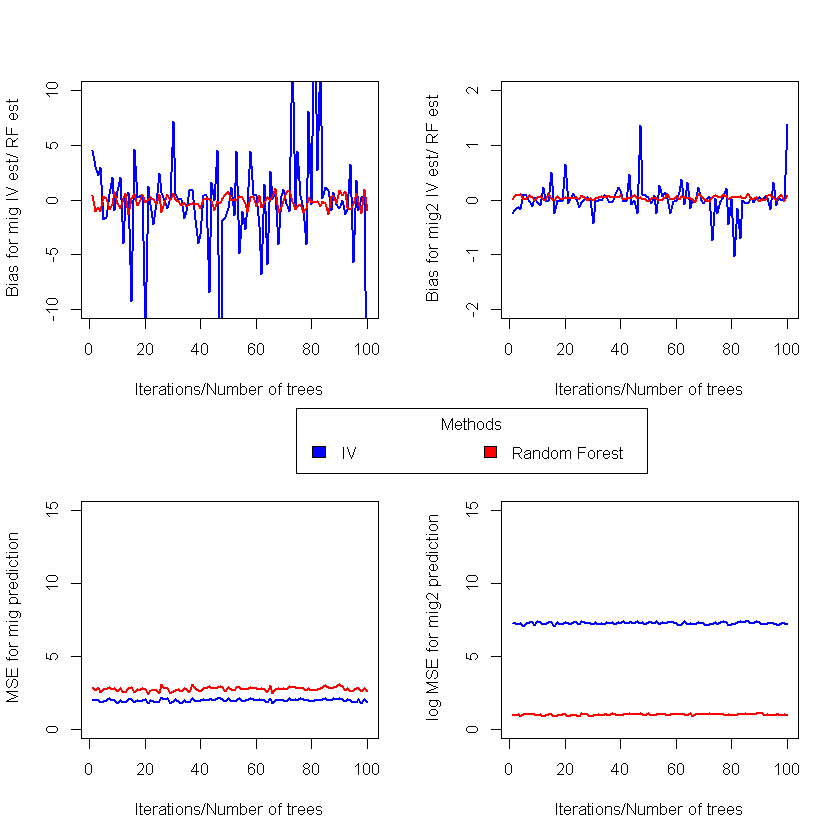

In [17]:
par(mfrow=c(2,2))
#Bias and mse versus iteration (gradual increase of number of trees)
plot(1:100, biasmigiv, xlab="Iterations/Number of trees", ylab=" Bias for mig IV est/ RF est", type="l", col="blue", lty=1, lwd=2,  ylim=c(-10,10))
lines(1:100, biasmigrf, col="red",lty=1, lwd=2)

#Bias in mig2 parameter
plot(1:100, biasmig2iv, xlab="Iterations/Number of trees", ylab=" Bias for mig2 IV est/ RF est", type="l", col="blue", lty=1, lwd=2,  ylim=c(-2,2))
lines(1:100, biasmig2rf, col="red",lty=1, lwd=2)

#MSE for migration prediction
plot(1:100, MSEMEGA[,1], xlab="Iterations/Number of trees", ylab=" MSE for mig prediction", type="l", col="blue", lty=1, lwd=2,  ylim=c(0,15))
lines(1:100, MSEMEGA[,2], col="red",lty=1, lwd=2)

#MSE for mig2 prediction
plot(1:100, log(MSEMEGA[,3]), xlab="Iterations/Number of trees", ylab=" log MSE for mig2 prediction", type="l", col="blue", lty=1, lwd=2,  ylim=c(0,15))
lines(1:100, log(MSEMEGA[,4]), col="red",lty=1, lwd=2)
legend(-77,22, ncol=2,legend=c("IV","Random Forest"), fill=c("blue","red"), title="Methods",xpd="NA")


par(mfrow=c(1,1))


As we can see from the graphs, the bias does not seem to depend on the number of trees. From this we can assume that overfitting is only a concern, if correlation between instrumental variables and endogenous variable is not high enough. The bias is still much less dispersed than the bias of the normal 2SLS and closer to 0, despite the fact that prob_var is now much more pronounced than before. 

# Conclusion

In our attempt to implement RF into IV estimation, we found than Random Forest is a better method when we have a high correlation between endogenous varibles. Even though IV method gives us consistent results, Random Forest seems to outperform this, when conditions are optimal.  

We know that in empirical studies we commonly come across the problem of endogeneity. Using and adopting machine learning techniques can actually help solve these problems, which also applies to the paper we have chosen. RF performs well even on small samples, like the original paper we have chosen, which is a big advantage for using it in empirical structural estimation, where big datasets are rare. It is important to use different methods like this in trial and error fashion to obtain better and more accurate results. We are quite certain that methods like this will help econometricians adopt more Machine Learning methods in the future.

# References
- James, G., Witten D., Hastie T., Tibshirani R. (2013) "An introduction to statistical learning",Springer, vol.112;
- Jeffrey M. Wooldridge, (2001) "Econometric Analysis of Cross Section and Panel Data," MIT Press Books, The MIT Press, ed. 1, vol. 1;
- Mckenzie, D., Rapoport, H. (2007) "Network effects and the dynamics of migration and inequality: Theory and evidence from Mexico," Journal of Development Economics, Elsevier, vol. 84(1), pages 1-24.